In [8]:
# Importujemy niezbędne biblioteki
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
# Ustawienie stylu wykresów (tło jasne)
sns.set_style('whitegrid')

Załaduj plik CSV jako Data Frame i wyświetl jego 4 pierwsze wiersze. Pamiętaj, przy wczytaniu zbioru Pokemon.csv parametr encoding należy ustawić na wartość latin.


In [13]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')
df.head(4)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Zgrupuj dane na podstawie wartości kolumny Type 1 następnie oblicz średnią dla wartość kolumny Defense dla każdej grupy.


In [46]:
srednia = df.groupby(['Type 1'])['Defense'].mean()
srednia.head(10)

Type 1
Bug         57.083333
Dragon      68.333333
Electric    64.666667
Fairy       60.500000
Fighting    61.000000
Fire        62.583333
Ghost       45.000000
Grass       69.583333
Ground      86.250000
Ice         67.500000
Name: Defense, dtype: float64

Utwórz nową kolumnę o nazwie Średnia obrona wg. Typu 1, gdzie dla każdego pokemona umieścisz obliczoną wcześniej średnią wartość obrony dla typu 1 (uwzględniając typ pokemona).

In [48]:
df['Średnia obrona wg. Typu 1'] = df['Type 1'].map(srednia)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,Średnia obrona wg. Typu 1
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,69.583333
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False,69.583333
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False,69.583333
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,62.583333
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False,62.583333


Utwórz nową kolumnę o nazwie Ulubiony, w której umieścisz wartość „Tak”, jeśli którykolwiek z typów Pokemona (kolumna Type 1 lub Type 2) jest typem kamiennym (wartość Rock). W przeciwnym wypadku, wstaw wartość „Nie”.

In [55]:
df['Ulubiony'] = df.apply(lambda x: 'Tak' if x['Type 1'] == 'Rock' or x['Type 2'] == 'Rock' else 'Nie', axis = 1)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,Średnia obrona wg. Typu 1,Ulubiony
#,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,69.583333,Nie
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False,69.583333,Nie
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False,69.583333,Nie
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,62.583333,Nie
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False,62.583333,Nie


Utwórz nową kolumnę o nazwie Dwa typy, gdzie połączysz myślnikiem wartości z kolumny Type 1 oraz Type 2.

In [57]:
df['Dwa typy'] = df['Type 1'] + '-' + df['Type 2']
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,Średnia obrona wg. Typu 1,Ulubiony,Dwa typy
#,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,69.583333,Nie,Grass-Poison
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False,69.583333,Nie,Grass-Poison
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False,69.583333,Nie,Grass-Poison
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,62.583333,Nie,NaN
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False,62.583333,Nie,NaN


Wyświetl liczbę wierszy w zbiorze danych. Usuń ze zbioru wszystkie legendarne pokemony i ponownie wyświetl liczbę wierszy w zbiorze danych.

In [77]:
rows = len(df.index)
print(rows)

147


In [78]:
df2 = df[df.Legendary != True]
rows = len(df2.index)
print(rows)

147


Wyświetl liczbę wszystkich pokemonów, które nie mają drugiego typu.


In [82]:
df3 = df[df['Type 2'].isna()]
rows = len(df3.index)
print(rows)

83


Zapisz zmodyfikowany Data Frame do nowego pliku modified_pokemon.csv.

In [83]:
df.to_csv('modified pokemon.csv', index = False)

WYKRESY

Na jednym płótnie (figure) wyświetl 4 różne wykresy (w dwóch rzędach i dwóch kolumnach). Ustaw wielkość płótna na (14,10).

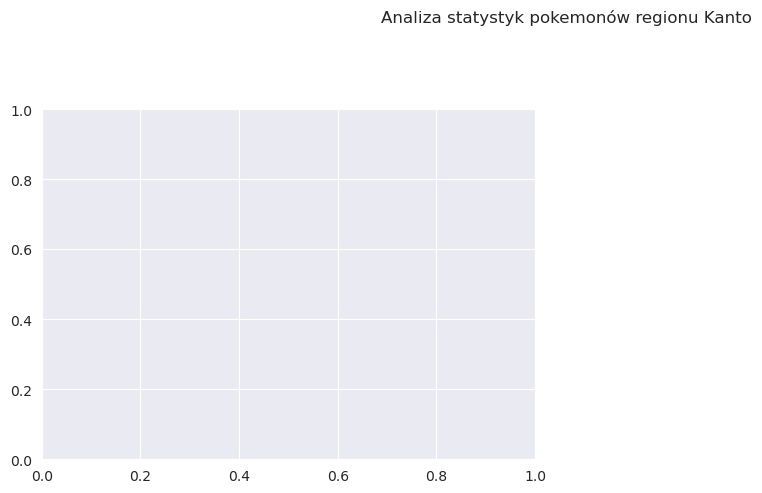

In [88]:
#Na jednym płótnie (figure) wyświetl 4 różne wykresy (w dwóch rzędach i dwóch kolumnach). Ustaw wielkość płótna na (14,10).
plt.figure(figsize=(14,10))

#Nadaj tytuł płótna – „Analiza statystyk pokemonów regionu Kanto”. Powiększ czcionkę tytułu, dla lepszej czytelności.
plt.suptitle("Analiza statystyk pokemonów regionu Kanto")

plt.subplot(2,2,1) #2 - ilość wierszy, 2 - ilość kolumn, 1 - na którym się skupiamy w tej chwili

plt.show()

Stwórz wykres słupkowy pokazujący średnie wartości ataku i obrony (kolumny Attack i Defense). Ustaw wybrane przez siebie kolory dla obu słupków.

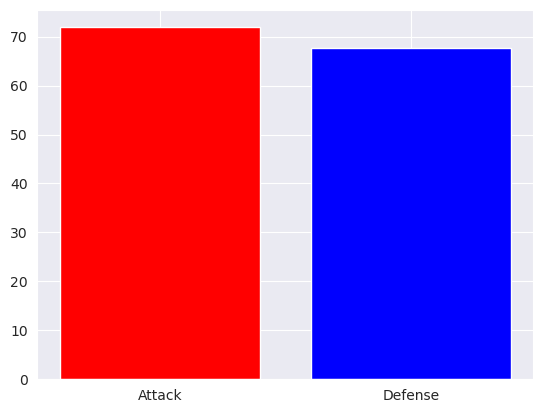

In [100]:
x = df[['Attack', 'Defense']].mean()
plt.bar(x.index, x.values, color = ['Red', 'Blue'])
plt.show()

Stwórz wykres kołowy przedstawiający procentowy rozkład pokemonów w zależności od ich podstawowego typu (kolumna Type 1). Wyświetl legendę opisującą typy pokemonów i przesuń ją poza obszar wykresu. Przedstaw wartości procentowe na wykresie (użyj parametru autopct do ustawienia wartości procentowych oraz pctdistance do ustawienia ich pozycji). Upewnij się, że każdy typ ma inny kolor na wykresie.